# Bipartite graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2019 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd

import networkx as nx

@list
def rolling_sum(xs, n):
    for i in range(len(xs)-n+1):
        yield sum(xs[i:i+n])
        
list(rolling_sum([1,2,3,4,5],3))

TypeError: 'function' object is not iterable

The following examples are from [the NetworkX documentation on bipartite graphs](https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html)

In [2]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

In [3]:
from networkx.algorithms import bipartite

bottom_nodes, top_nodes = bipartite.sets(B)
bottom_nodes, top_nodes

({1, 2, 3, 4}, {'a', 'b', 'c'})

In [4]:
bipartite.is_bipartite(B)

True

In [5]:
B.add_edge(1, 2)
bipartite.is_bipartite(B)

False

**Exercise:** Write a generator function called `cross_edges` that takes a NetworkX `Graph` object, `G`, and a Python `set` object, `top`, that contains nodes.

It should compute another `set` called `bottom` that contains all nodes in `G` that are not in `top`.

Then it should yield all edges in `G` that connect a node in `top` to a node in `bottom`.

In [31]:
top = set([1, 2, 3, 4])
bottom = set(['a', 'b', 'c', 'd'])

In [32]:
def flip(p):
    return np.random.random() < p

In [33]:
from itertools import product

G = nx.Graph()
p = 0.5
for u, v in product(top, bottom):
    if flip(p):
        G.add_edge(u, v)

In [34]:
bipartite.is_bipartite(G)

NameError: name 'bipartite' is not defined

In [41]:
import networkx as nx

def cross_edges(G, top):
    bottom = set(G.nodes)-top
    top = top & set(G.nodes)
    for node in top:
        for neighbor in G[node]:
            if neighbor in bottom:
                yield (node,neighbor)

(1, 'b')
(1, 'c')
(1, 'a')
(1, 'd')
(2, 'b')
(2, 'a')
(3, 'c')
(4, 'd')


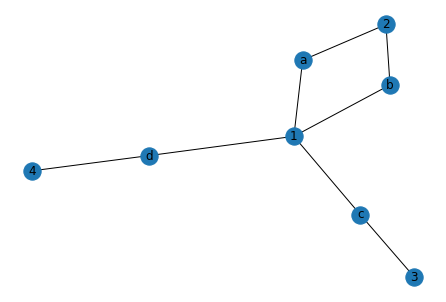

In [36]:
for edge in iter(cross_edges(G, top)):
    print(edge)
    
nx.draw(G,with_labels = True)

In [92]:
len(list(cross_edges(G, top)))

12

In [24]:
sum(1 for edge in cross_edges(G, top))

9

In [25]:
G.number_of_edges()

9

In [26]:
G.size()

9

**Exercise:** Write a function called `is_bipartite` that takes a `Graph` and a set of top nodes, and checks whether a graph is bipartite.

In [16]:
# Solution goes here

In [17]:
is_bipartite(G, top)

In [18]:
is_bipartite(B, top)

In [19]:
# Solution goes here

In [20]:
is_bipartite(G, top)

In [21]:
is_bipartite(B, top)